# Main module
It is written in Jupyter Noteboook for better look

## Preparation

In [1]:
# Import some stuff for plots

%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# Import library modules

from binascii import crc32

In [3]:
# Import project files

from Generate.Generate import generate_dataset
from Decorators import time
from Encrypt import *

## Set some constants

In [4]:
file_name = './data/words_list.txt'  # Path to file with list of words

## Data preparation

In [5]:
words = generate_dataset(file_name)

Time elapsed: 267262 msec (0 sec)


In [6]:
print("Set 'words' contains {} elements".format(len(words)))

Set 'words' contains 420394 elements


In [7]:
caesar_3 = Caesar.encrypt(words, 3)
caesar_4 = Caesar.encrypt(words, 4)
caesar_5 = Caesar.encrypt(words, 5)

Time elapsed: 833492 msec (0 sec)
Time elapsed: 845300 msec (0 sec)
Time elapsed: 817205 msec (0 sec)


In [8]:
affine_3_4  = Affine.encrypt(words, 3, 4)
affine_5_2  = Affine.encrypt(words, 5, 2)
affine_9_11 = Affine.encrypt(words, 9, 11)

Time elapsed: 811561 msec (0 sec)
Time elapsed: 825007 msec (0 sec)
Time elapsed: 799798 msec (0 sec)


## Some hypotheses

There are different ways to build classifier:

- try to calculate some unique number for each word
and build classifier based on these numbers

- vectorize words and build classifier based on vectors

### Number calculation

In [9]:
@time.benchmark
def map_codes_and_words(words_dict, hash_func):
    """Helper function. It costructs dict with encrypted
    words as keys and their codes as values.
    """
    return {words_dict[key]: hash_func(words_dict[key].encode('utf-8')) for key in words_dict}

In [10]:
d_caesar_3 = map_codes_and_words(caesar_3, crc32)
d_caesar_4 = map_codes_and_words(caesar_4, crc32)
d_caesar_5 = map_codes_and_words(caesar_5, crc32)

Time elapsed: 294931 msec (0 sec)
Time elapsed: 304228 msec (0 sec)
Time elapsed: 321137 msec (0 sec)


In [11]:
d_affine_3_4  = map_codes_and_words(affine_3_4, crc32)
d_affine_5_2  = map_codes_and_words(affine_5_2, crc32)
d_affine_9_11 = map_codes_and_words(affine_9_11, crc32)

Time elapsed: 305609 msec (0 sec)
Time elapsed: 292390 msec (0 sec)
Time elapsed: 293059 msec (0 sec)


In [12]:
def calculate_intersection(first, second):
    """Helper function. It returns an intersection of 
    values sets of two dicts.
    """
    first_set  = {value for value in first.values()}
    second_set = {value for value in second.values()}
    return first_set.intersection(second_set)

In [13]:
# Test helper

assert(calculate_intersection({'a': 97, 'b': 98}, {'c': 99, 'd': 100}) == set())
assert(calculate_intersection({'a': 97, 'b': 99}, {'c': 99, 'd': 100}) == {99})

In [14]:
# caesar 3 and caesar 4
intersection_1  = len(calculate_intersection(d_caesar_3, d_caesar_4))
# caesar 3 and caesar 5
intersection_2  = len(calculate_intersection(d_caesar_3, d_caesar_5))
# caesar 3 and affine 3 4
intersection_3  = len(calculate_intersection(d_caesar_3, d_affine_3_4))
# caesar 3 and affine 5 2
intersection_4  = len(calculate_intersection(d_caesar_3, d_affine_5_2))
# caesar 3 and affine 9 11
intersection_5  = len(calculate_intersection(d_caesar_3, d_affine_9_11))

# caesar 4 and caesar 5
intersection_6  = len(calculate_intersection(d_caesar_4, d_caesar_5))
# caesar 4 and affine 3 4
intersection_7  = len(calculate_intersection(d_caesar_4, d_affine_3_4))
# caesar 4 and affine 5 2
intersection_8  = len(calculate_intersection(d_caesar_4, d_affine_5_2))
# caesar 4 and affine 9 11
intersection_9  = len(calculate_intersection(d_caesar_4, d_affine_9_11))

# caesar 5 and affine 3 4
intersection_10 = len(calculate_intersection(d_caesar_5, d_affine_3_4))
# caesar 5 and affine 5 2
intersection_11 = len(calculate_intersection(d_caesar_5, d_affine_5_2))
# caesar 5 and affine 9 11
intersection_12 = len(calculate_intersection(d_caesar_5, d_affine_9_11))

# affine 3 4 and affine 5 2
intersection_13 = len(calculate_intersection(d_affine_3_4, d_affine_5_2))
# affine 3 4 and affine 9 11
intersection_14 = len(calculate_intersection(d_affine_3_4, d_affine_9_11))

# affine 5 2 and affine 9 11
intersection_15 = len(calculate_intersection(d_affine_5_2, d_affine_9_11))

In [15]:
intersections = [
      intersection_1,  intersection_2
    , intersection_3,  intersection_4
    , intersection_5,  intersection_6
    , intersection_7,  intersection_8
    , intersection_9,  intersection_10
    , intersection_11, intersection_12
    , intersection_13, intersection_14
    , intersection_15
]

In [16]:
rng = [i+1 for i in range(len(intersections))]  # Range to plot
threshold = 1820 
threshhold_line = [threshold for i in range(len(rng))]

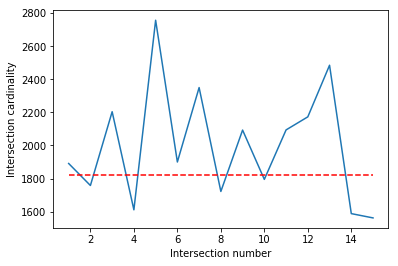

In [17]:
plt.plot(  rng, intersections
         , rng, threshhold_line, 'r--')
plt.xlabel('Intersection number')
plt.ylabel('Intersection cardinality')
plt.show()

### Some inferences

As we can see, the most different sets are given by following:
- caesar_3 and caesar_5 (intersection 2)
- caesar_3 and affine_5_2 (intersection 4)
- caesar_4 and affine_5_2 (intersection 8)
- caesar_5 and affine_3_4 (intersection 10)
- affine_3_4 and affine_9_11 (intersection 14)
- affine_5_2 and affine_9_11 (intersection 15)